<a href="https://colab.research.google.com/github/RedBatProject/Works/blob/main/work_75_fyzer_from_49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
!pip install transformers==4.37.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import numpy as np
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from itertools import chain
import tensorflow as tf
# from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
# from transformers import XLNetTokenizer, TFXLNetModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, log_loss
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
%matplotlib inline

In [3]:
# import plotly.express as px
# import plotly.graph_objs as go
# import plotly.offline as pyo
# from plotly.subplots import make_subplots

# Load Data

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"willyvonka","key":"5126a29ceedbfdc4a11419e257598dd4"}'}

In [7]:
import json

In [8]:
import json
u = {"username":"willyvonka","key":"5126a29ceedbfdc4a11419e257598dd4"}
h = open('./kaggle.json','w')
json.dump(u,h)
h.close()

In [9]:
# h = open('./kaggle.json','w')
# json.dump(u,h)
# h.close()

In [10]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [11]:
!kaggle datasets download -d gpreda/pfizer-vaccine-tweets

100% 1.76M/1.76M [00:01<00:00, 1.93MB/s]
100% 1.76M/1.76M [00:01<00:00, 1.71MB/s]


In [12]:
!unzip /content/pfizer-vaccine-tweets.zip

Archive:  /content/pfizer-vaccine-tweets.zip
  inflating: vaccination_tweets.csv  


# Read Data

In [4]:
import os
path0 = '/content/drive/MyDrive/work-75-fyzer/'
path = path0+'results/'
#
os.makedirs(path0,exist_ok=True)
os.makedirs(path,exist_ok=True)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !mv /content/vaccination_tweets.csv 'data.csv'

In [14]:
df=pd.read_csv("/content/vaccination_tweets.csv")
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


In [15]:


!pip install vaderSentiment
!pip install twython



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [16]:
import re

In [17]:
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[^A-Za-z0-9 ]','', text)
    return text



df['text'] = df['text'].apply(lambda x:clean(x))


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(df['text'])):

    score = analyser.polarity_scores(df['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['sentiment']=pd.Series(np.array(sentiment))

In [ ]:
# re.sub('[^A-Za-z0-9 ]','','#$hello 9')

In [ ]:
# df.to_csv(f'{path}data.csv',index=False)

In [19]:
df = df[['text','sentiment']]

In [23]:
df.dropna(inplace=True)

<ipython-input-23-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [24]:
df.shape

(11020, 2)

In [25]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [26]:
df

,text,sentiment
0,Same folks said daikon paste could treat a cyt...,Positive
1,While the world has been on the wrong side of ...,Negative
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,Positive
3,Facts are immutable Senator even when youre no...,Neutral
4,Explain to me again why we need a vaccine Bori...,Neutral
...,...,...
11015,The number of Covid cases today November Rem...,Positive
11016,First dose PfizerBioNTech,Neutral
11017,The number of Covid cases today November Rem...,Positive
11018,PfizerBioNTech has developed new pill Paxlovid...,Positive


In [ ]:
clc = df.columns

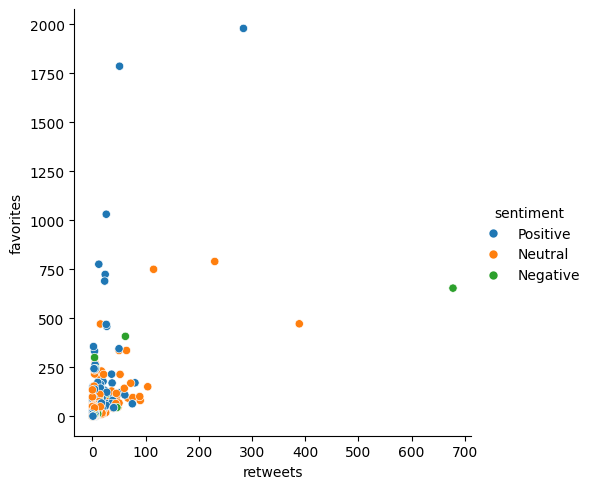

In [ ]:
sns.relplot(data=df,x=clc[-4],y=clc[-3],hue=clc[-1])
# plt.xlim(0,0.4*1000000)
# plt.ylim(0,25000)
# plt.xticks(rotation=90)

### You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

In [ ]:
df.columns

Index(['text', 'sentiment'], dtype='object')

In [28]:
df.sentiment.value_counts()

sentiment
Neutral     4582
Positive    4573
Negative    1865
Name: count, dtype: int64

In [27]:
df['label'],l1 = df['sentiment'].factorize()

<ipython-input-27-a60eba1a4da1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'],l1 = df['sentiment'].factorize()


In [29]:
df

,text,sentiment,label
0,Same folks said daikon paste could treat a cyt...,Positive,0
1,While the world has been on the wrong side of ...,Negative,1
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,Positive,0
3,Facts are immutable Senator even when youre no...,Neutral,2
4,Explain to me again why we need a vaccine Bori...,Neutral,2
...,...,...,...
11015,The number of Covid cases today November Rem...,Positive,0
11016,First dose PfizerBioNTech,Neutral,2
11017,The number of Covid cases today November Rem...,Positive,0
11018,PfizerBioNTech has developed new pill Paxlovid...,Positive,0


In [30]:
# df.to_csv('/content/drive/MyDrive/data/work 49 phyzer/df3.csv',index=False)
# df

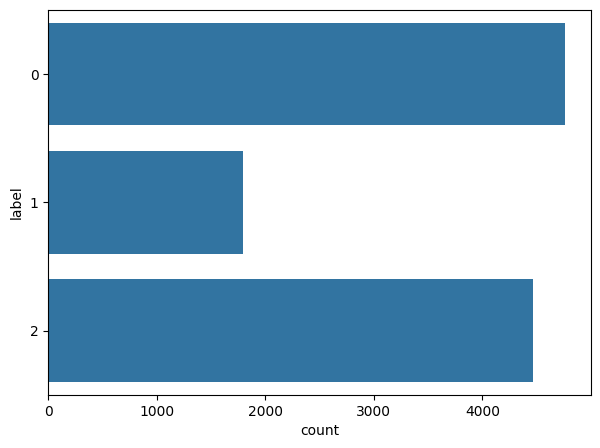

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, y="label")
# plt.title("Compare Target")
df[['label','sentiment']].to_csv(f'{path}_labels.csv',index=False)
plt.savefig(f'{path}_labels.png',bbox_inches='tight')
plt.show()

In [ ]:
df.columns

Index(['text', 'sentiment', 'label'], dtype='object')

# Count Character

In [ ]:
df.columns = ['text','emotion','label']

In [ ]:
df["character_count"]=df["text"].str.len()

<ipython-input-35-1295d44f0b67>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Count Word

In [ ]:
df = df.copy()

In [ ]:
df['word_count'] = df['text'].str.split().str.len()
df["character_count"]=df["text"].str.len()

In [ ]:
df['word_count'].max()

31

# Count Sentence

In [ ]:
# cor=df[["target","character_count","word_count"]].corr()
# plt.figure(figsize=(7,5))
# sns.heatmap(cor,annot=True,cmap="jet",linewidths=7, linecolor='darkorange')
# cor.to_csv(f'{path}_cor.csv')
# plt.savefig(f'{path}_cor.png',bbox_inches='tight')
# plt.show()

# Data Length

In [31]:
df['len'] = df['text'].str.split().apply(len)

<ipython-input-31-2e274bd00763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len'] = df['text'].str.split().apply(len)


In [32]:
df

,text,sentiment,label,len
0,Same folks said daikon paste could treat a cyt...,Positive,0,11
1,While the world has been on the wrong side of ...,Negative,1,20
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,Positive,0,12
3,Facts are immutable Senator even when youre no...,Neutral,2,18
4,Explain to me again why we need a vaccine Bori...,Neutral,2,13
...,...,...,...,...
11015,The number of Covid cases today November Rem...,Positive,0,16
11016,First dose PfizerBioNTech,Neutral,2,3
11017,The number of Covid cases today November Rem...,Positive,0,16
11018,PfizerBioNTech has developed new pill Paxlovid...,Positive,0,16


In [33]:
df = df.copy()

<Axes: ylabel='Frequency'>

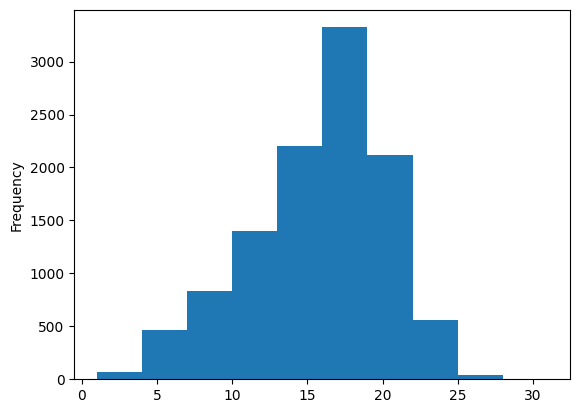

In [ ]:
df.len.plot(kind='hist')

In [34]:
df = df[df['len']>=5]

In [ ]:
# notdisaster_len=df[df["target"]==0]["text"].str.split().apply(len)
# disaster_len=df[df["target"]==1]["text"].str.split().apply(len)
# plt.figure(figsize=(7,5))
# plt.hist(notdisaster_len, bins=40,label='Fake',color="red")
# plt.hist(disaster_len , bins=40, label='Real',color="green")
# plt.xlim(0,2000)
# plt.title("Real Vs Fake tweet")
# plt.legend()
# notdisaster_len.to_csv(f'{path}_Fake_len.csv',index=False)
# disaster_len.to_csv(f'{path}_Real_len.csv',index=False)

# plt.savefig(f'{path}_Real-Fake_len.png',bbox_inches='tight')
# plt.show()

In [36]:
df['len'].mean()

14.85176184690158

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/data/work 49 phyzer/df3.csv')
# df

# ALL Data Wordcloud

In [ ]:
# plt.figure(figsize=(16,8),dpi=600)
# all_text=" ".join(df['text'].values.tolist())
# wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(all_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig(f'{path}_all_data.png',bbox_inches='tight')
# plt.show()

# Disaster Data Wordcloud

In [ ]:
# plt.figure(figsize=(16,8),dpi=600)
# disaster_wordcloud=df[df["target"]==1]
# disaster_text=" ".join(disaster_wordcloud['text'].values.tolist())
# wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(disaster_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig(f'{path}_disaster_data.png',bbox_inches='tight')
# plt.show()

# Non Disaster Wordcloud

In [ ]:
# plt.figure(figsize=(16,8),dpi=600)
# nondisaster_wordcloud=df[df["target"]==0]
# nondisaster_text=" ".join(nondisaster_wordcloud['text'].values.tolist())
# wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(nondisaster_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig(f'{path}_non_disaster_data.png',bbox_inches='tight')
# plt.show()

# 30 Most common Words From All Text

In [ ]:
# data_set =df["text"].str.split()
# all_words = list(chain.from_iterable(data_set))
# counter = Counter(all_words)
# common_words = counter.most_common(30)
# df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# colors = ["darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen",
#     "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
#           "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",

#           "cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen"]

# plt.figure(figsize=(12, 6))
# sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
# plt.title('30 Most Common Words')
# plt.xlabel('Count')
# plt.ylabel('Word')
# df_common_words.to_csv(f'{path}_df_common_words.csv')
# plt.savefig(f'{path}_df_common_words.png',bbox_inches='tight')
# plt.show()


# Most Common Words From Non Disaster Text

In [ ]:
df

,text,emotion,label,character_count,word_count,len
0,Same folks said daikon paste could treat a cyt...,Positive,0,74,11,11
1,While the world has been on the wrong side of ...,Negative,1,117,20,20
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Positive,0,107,14,14
3,"Facts are immutable, Senator, even when you're...",Neutral,2,116,19,19
4,Explain to me again why we need a vaccine @Bor...,Neutral,2,112,13,13
...,...,...,...,...,...,...
11014,@ruvanw @GMalavige @ I already had my for #Pf...,Neutral,2,89,15,15
11015,"The number of Covid- cases today, November . ...",Positive,0,109,17,17
11017,"The number of Covid- cases today, November . ...",Positive,0,109,17,17
11018,#PfizerBioNTech has developed new pill #Paxlov...,Positive,0,110,17,17


In [ ]:
import re

In [ ]:
def removepunc(x):
    x = x.lower()
    x = re.sub(r" ' ","",x)
    x = re.sub(r"'","",x)
    x = re.sub(r"\r"," ",x)
    x = re.sub(r"\n"," ",x)
    # x = re.sub(r" / ","",x)

    # x = re.sub(r" . ","",x)

    x = re.sub(r"(@[A-Za-z]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x)
    # x = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    return x

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def lenword(x):
  # l = x.spllit()
  x = ' '.join([word for word in x.split() if (len(word) > 1 or word in (['i','a']))])
#   x = ' '.join([word for word in x.split() if word not in stop_words])

  return x

In [ ]:
df['text2'] = df['text'].apply(lambda x:removepunc(x))

In [ ]:
df['text2'] = df['text2'].apply(lambda x:lenword(x))

In [ ]:
df['text2']

0        same folks said daikon paste could treat a cyt...
1        while the world has been on the wrong side of ...
2        coronavirus sputnikv astrazeneca pfizerbiontec...
3        facts are immutable senator even when youre no...
4        explain to me again why we need a vaccine wher...
                               ...                        
11014    i already had my for pfizerbiontech last month...
11015    the number of covid cases today november remem...
11017    the number of covid cases today november remem...
11018    pfizerbiontech has developed new pill paxlovid...
11019    the number of covid cases today november remem...
Name: text2, Length: 10817, dtype: object

In [5]:
# df.to_csv(f'{path}data.csv',index=False)
# df = pd.read_csv(f'{path}data.csv')

In [ ]:
from collections import Counter

<ipython-input-62-3b66102b2b53>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




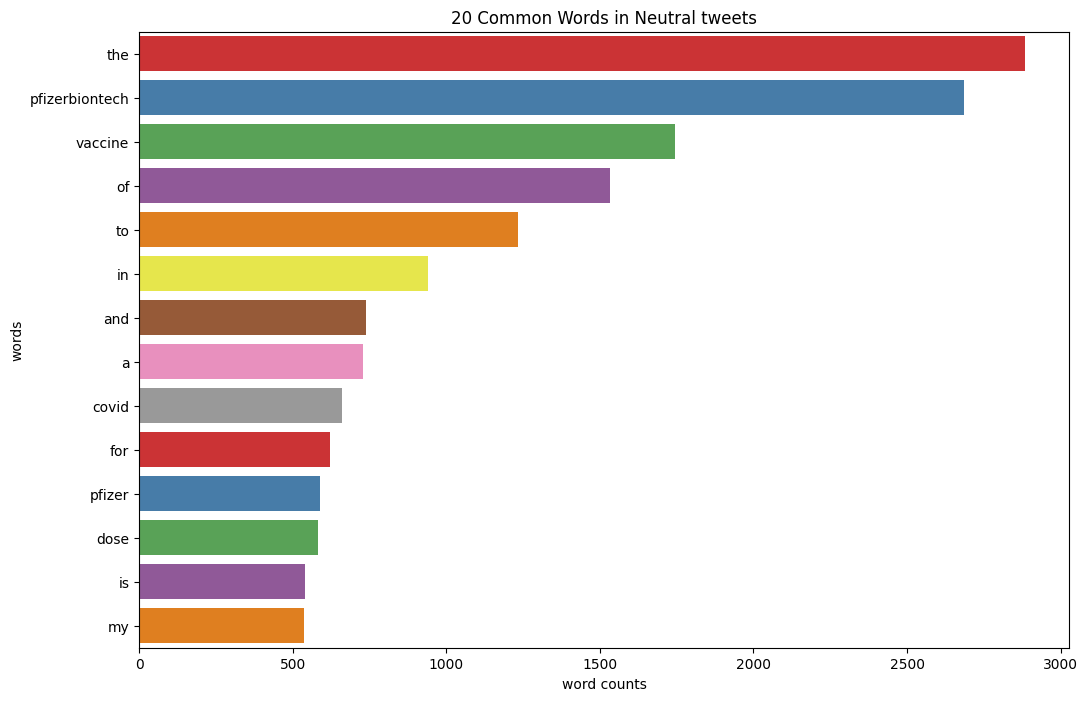

In [ ]:
no_disaster_text = df[df["label"] == 2]
data_set = no_disaster_text["text2"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(14)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('20 Common Words in Neutral tweets')
plt.xlabel('word counts')
plt.ylabel('words')
# plt.ylabel('Word')
df_common_words.to_csv(f'{path}_df_common_words_neutral.csv')
plt.savefig(f'{path}_df_common_words_neutral.png',bbox_inches='tight')
plt.show()



# 30 Most Common Words From Disaster Text

In [ ]:
# disaster_text = df[df["target"] == 1]
# data_set = disaster_text["text"].str.split()
# all_words = [word for sublist in data_set for word in sublist]
# counter = Counter(all_words)
# common_words = counter.most_common(30)
# df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
# plt.figure(figsize=(12, 8))
# colors = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "brown", "gray",
#           "cyan", "magenta", "teal", "olive", "lime", "navy", "maroon", "aquamarine",
#           "coral", "gold", "indigo", "lavender", "salmon", "silver", "tan", "violet",
#           "crimson", "darkgreen", "darkblue", "darkorange", "deeppink"]
# sns.barplot(x='Count', y='Word', data=df_common_words,palette=colors)
# plt.title('30 Most Common Words Real')
# plt.xlabel('Count  Real')
# plt.ylabel('Real Word')
# df_common_words.to_csv(f'{path}_df_common_words_Real.csv')
# plt.savefig(f'{path}_df_common_words_Real.png',bbox_inches='tight')
# plt.show()


# Character Count

In [ ]:
# color=["red","green"]
# plt.figure(figsize=(7,5))

# sns.histplot(data=df,x="character_count",palette=color,kde=True,hue="label",element="step",stat="density")
# plt.title("Character Count",fontsize=15,color="darkblue")
# df['character_count'].to_csv(f'{path}_character_count.csv')
# plt.savefig(f'{path}_character_count.png',bbox_inches='tight')
# plt.show()

# Word Count

In [ ]:
# color=["navy","darkorange"]
# plt.figure(figsize=(7,5))

# sns.histplot(data=df,x="word_count",palette=color,kde=True,hue="label")
# plt.title("Word Count",fontsize=15,color="darkblue")
# plt.xlim(0,2000)
# df[['word_count','label']].to_csv(f'{path}_word_count.csv')
# plt.savefig(f'{path}_word_count.png',bbox_inches='tight')
# plt.show()

# Sentence Count

In [ ]:
df.columns

Index(['text', 'emotion', 'label', 'character_count', 'word_count', 'len',
       'text2'],
      dtype='object')

In [ ]:
df.drop(['character_count', 'word_count','text2'],axis=1,inplace=True)

# Average Sentence Length

In [ ]:
df['len'].mean(),df['len'].max()

(15.484792456318758, 31)

In [ ]:
df.columns

Index(['text', 'emotion', 'label', 'len'], dtype='object')

In [ ]:
avg_len=df["text"].str.split().apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 15.27


# Maximum Length

In [5]:
df = pd.read_csv(f'{path}data.csv')


In [6]:
SEQ_LEN=20

In [7]:
text_data=df["text"]
label_data=df["label"]
label_data=np.array(label_data)

# Teransformer 2

In [8]:
# SEQ_LEN = 1250

In [9]:
tf.keras.backend.clear_session()

In [10]:
# pip install transformers

In [11]:
from transformers import AutoTokenizer
from transformers import TFAutoModel

In [12]:

# 10. GPT-Neo (Generative Pre-trained Transformer Neo):
#     - Full Name: `EleutherAI/gpt-neo-1.3B,gpt2` (or other versions with varying model sizes)

# 19. MarianMT (Multilingual Transformer-based Machine Translation):
#     - Full Name: `Helsinki-NLP/opus-mt-{src}-{tgt}` (Replace `{src}` and `{tgt}` with language codes)

In [13]:
kk = 't5-small,google/electra-base-discriminator,albert-base-v2,xlnet-base-cased,distilbert-base-uncased,roberta-base,bert-base-uncased,google/mt5-small,allenai/longformer-base-4096,facebook/bart-large,microsoft/mpnet-base,funnel-transformer/small-base,microsoft/deberta-base,google/mobilebert-uncased,xlm-roberta-base,ctrl,EleutherAI/gpt-neo-1.3B,gpt2,GPT-4/GPT-3/main,asi/albert-act-base,asi/albert-act-small,prajjwal1/bert-tiny,TheBloke/llama-2-70b-Guanaco-QLoRA-fp16,vinai/bertweet-base,nlpproject2023/small-bert,readerbench/RoBERT-small,SamLowe/roberta-base-go_emotions,roberta-base'.split(',')
len(kk)

28

In [14]:
# m = "stevhliu/my_awesome_model"
# m = 'TheBloke/llama-2-70b-Guanaco-QLoRA-fp16'
# m = 'GPT2'
# m = 'vinai/bertweet-base'
# m = 'GPT-4/GPT-3'
# m = 'tum-nlp/IDMGSP-Galactica-TRAIN_GPT3'
# m = 'asi/albert-act-small'
# m ='prajjwal1/bert-tiny'
# m = 'asi/albert-act-base'
# m = 'albert-base-v2'

In [15]:
# 0,
# 7
# 18
# 19
# 20


In [16]:
kk

['t5-small',
 'google/electra-base-discriminator',
 'albert-base-v2',
 'xlnet-base-cased',
 'distilbert-base-uncased',
 'roberta-base',
 'bert-base-uncased',
 'google/mt5-small',
 'allenai/longformer-base-4096',
 'facebook/bart-large',
 'microsoft/mpnet-base',
 'funnel-transformer/small-base',
 'microsoft/deberta-base',
 'google/mobilebert-uncased',
 'xlm-roberta-base',
 'ctrl',
 'EleutherAI/gpt-neo-1.3B',
 'gpt2',
 'GPT-4/GPT-3/main',
 'asi/albert-act-base',
 'asi/albert-act-small',
 'prajjwal1/bert-tiny',
 'TheBloke/llama-2-70b-Guanaco-QLoRA-fp16',
 'vinai/bertweet-base',
 'nlpproject2023/small-bert',
 'readerbench/RoBERT-small',
 'SamLowe/roberta-base-go_emotions',
 'roberta-base']

In [17]:
'XLNetTokenizer, AlbertTokenizer, CamembertTokenizer, MBartTokenizer, PegasusTokenizer, T5Tokenizer, ReformerTokenizer, XLMRobertaTokenizer '

'XLNetTokenizer, AlbertTokenizer, CamembertTokenizer, MBartTokenizer, PegasusTokenizer, T5Tokenizer, ReformerTokenizer, XLMRobertaTokenizer '

In [18]:
pip install transformers[sentencepiece]


In [17]:
import transformers

In [18]:
# pip install sentencepiece

In [19]:
kk

['t5-small',
 'google/electra-base-discriminator',
 'albert-base-v2',
 'xlnet-base-cased',
 'distilbert-base-uncased',
 'roberta-base',
 'bert-base-uncased',
 'google/mt5-small',
 'allenai/longformer-base-4096',
 'facebook/bart-large',
 'microsoft/mpnet-base',
 'funnel-transformer/small-base',
 'microsoft/deberta-base',
 'google/mobilebert-uncased',
 'xlm-roberta-base',
 'ctrl',
 'EleutherAI/gpt-neo-1.3B',
 'gpt2',
 'GPT-4/GPT-3/main',
 'asi/albert-act-base',
 'asi/albert-act-small',
 'prajjwal1/bert-tiny',
 'TheBloke/llama-2-70b-Guanaco-QLoRA-fp16',
 'vinai/bertweet-base',
 'nlpproject2023/small-bert',
 'readerbench/RoBERT-small',
 'SamLowe/roberta-base-go_emotions',
 'roberta-base']

In [ ]:
# 0,
# 7
# 18
# 19
# 20


In [20]:
i = 1
print(kk[i])


google/electra-base-discriminator


In [21]:
tokenizer = AutoTokenizer.from_pretrained(kk[i])

# tokenizer = AutoTokenizer.from_pretrained('readerbench/RoBERT-small')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [22]:
bert = TFAutoModel.from_pretrained(kk[i]
                                   ,from_pt=True
                                   )
# bert = TFAutoModel.from_pretrained('readerbench/RoBERT-small')


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraModel: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'electra.embeddings_project.bias', 'discriminator_predictions.dense.weight', 'electra.embeddings_project.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing TFElectraModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFElectraModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel 

In [23]:
# import tensorflow as tf
# from transformers import MT5Tokenizer, TFAutoModelForSequenceClassification

# # Load pre-trained MT5 model and tokenizer
# model_name = 'google/mt5-small'
# tokenizer = MT5Tokenizer.from_pretrained(model_name)
# bert = TFAutoModel.from_pretrained(kk[i])

In [24]:
# AutoTokenizer.from_pretrained

In [25]:
data = df.copy()


In [26]:
# SEQ_LEN = 22

In [27]:
# data = data.sample(frac=0.1)

In [28]:
Xids = np.zeros((len(data),SEQ_LEN))
Xmask = np.zeros((len(data),SEQ_LEN))


In [29]:
Xids.shape

(10699, 20)

In [30]:
# tokenizer.eos_token

In [31]:
tokenizer.pad_token = '<|PAD|>'

In [32]:
for i, sequence in enumerate(data['text']):
    tokens = tokenizer.encode_plus(
    sequence,
    max_length = SEQ_LEN,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='tf'
    )
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [33]:
import tensorflow as tf

In [34]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [35]:
labels = data['label']

In [36]:
s = data['label'].to_numpy()

In [37]:
s.max(),s.shape[0]

(2, 10699)

In [38]:
s

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
s1 = np.zeros((s.shape[0],s.max()+1))

In [40]:
s1.shape

(10699, 3)

In [41]:
for i,j in enumerate(s):
    s1[i][j] = 1

In [42]:
labels = s1

In [43]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [44]:
for i in dataset:
    print(i)
    break

(<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([  101.,  2168., 12455.,  2056., 18765., 19648., 19351.,  2071.,
        7438.,  1037., 22330., 18715.,  3170.,  4040.,  1052.,  8873.,
        6290., 26282., 10111.,   102.])>, <tf.Tensor: shape=(20,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])>, <tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 0., 0.])>)


In [45]:
# labels.sum(axis=0)

In [46]:
def map_func(input_ids, masks, labels):
    return{'input_ids': input_ids, 'attention_mask':masks}, labels

In [47]:
dataset = dataset.map(map_func)

In [48]:
dataset = dataset.shuffle(1000000).batch(32)

In [49]:
DS_LEN = len(list(dataset))

In [50]:
DS_LEN

335

In [51]:
dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 20), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(None, 20), dtype=tf.float64, name=None)}, TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [52]:
# round(DS_LEN*SPLIT)

In [53]:
# len(train)

In [54]:
DATASET_SIZE = len(dataset)

In [55]:
train_size = int(0.65 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.25 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [56]:
train = train_dataset
test = test_dataset
val = val_dataset

In [57]:
# SPLIT = 0.8
# train = dataset.take(round(DS_LEN*SPLIT))
# val = dataset.skip(round(DS_LEN*SPLIT))
# test = dataset.skip(round())
# # del dataset

In [58]:
labels.shape

(10699, 3)

In [59]:
tf.keras.backend.clear_session()

In [60]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalMaxPooling1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.Dense(32, activation = 'relu')(X)
# X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(32, activation = 'relu')(X)
y = tf.keras.layers.Dense(3, activation = 'softmax' , name = 'outputs')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs = y)

In [61]:
model.layers

In [62]:
model.layers[2].trainable = False

In [63]:
# model.load_weights(f'{path0}checkpoint')

In [64]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 20)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 20)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_electra_model (TFElectr  TFBaseModelOutputWithPastA   1088916   ['input_ids[0][0]',           
 aModel)                     ndCrossAttentions(last_hid   48         'attention_mask[0][0]']      
                             den_state=(None, 20, 768),                                       

In [65]:
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf

In [66]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [67]:
from tensorflow.keras.optimizers import Adam, Adamax,RMSprop
# Adamax(learning_rate=0.1)

In [ ]:
# model.load_weights(f'{path}checkpoint')

In [68]:
# model.compile(optimizer=Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(num_thresholds=3)])
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

# tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [69]:
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy','AUC'])
# model.load_weights(f'{path}checkpoint')


In [76]:
num_epochs = 30
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

Epoch 1/30
217/217 [==============================] - 20s 91ms/step - loss: 0.7001 - accuracy: 0.6850 - val_loss: 0.5116 - val_accuracy: 0.7866 - lr: 0.0010
Epoch 2/30
217/217 [==============================] - 19s 88ms/step - loss: 0.6929 - accuracy: 0.6897 - val_loss: 0.4883 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 3/30
217/217 [==============================] - 21s 95ms/step - loss: 0.6982 - accuracy: 0.6891 - val_loss: 0.5123 - val_accuracy: 0.8016 - lr: 0.0010
Epoch 4/30
217/217 [==============================] - 20s 90ms/step - loss: 0.6928 - accuracy: 0.6972 - val_loss: 0.5059 - val_accuracy: 0.7911 - lr: 0.0010
Epoch 5/30
217/217 [==============================] - 19s 88ms/step - loss: 0.6930 - accuracy: 0.6936 - val_loss: 0.5139 - val_accuracy: 0.8009 - lr: 0.0010
Epoch 6/30
217/217 [==============================] - 20s 91ms/step - loss: 0.6965 - accuracy: 0.6913 - val_loss: 0.4998 - val_accuracy: 0.7980 - lr: 0.0010
Epoch 7/30
217/217 [==============================] - ETA:

KeyboardInterrupt: 

In [79]:
model.save_weights(f'{path}checkpoint')

In [73]:
kk[1]

'google/electra-base-discriminator'

In [77]:
tr = []
pr = []
l = 0
# for k in range(len(val)):


for i,j in test.take(-1):
  # l += 1
  # print(l)
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
pa = 'google_electra-base-discriminator_80_20'

ff.to_csv(f'{path0}{pa}.csv',index=False)

In [ ]:
# os.mkdir(f'{path0}44/')
# path0
# path2 = f'{path0}44/'

In [ ]:
# model.save_weights(f'{path}checkpoint')

In [219]:
# precision = tf.keras.metrics.Precision()
# recall = tf.keras.metrics.Recall()
# accuracy = tf.keras.metrics.CategoricalAccuracy()
# auc = tf.keras.metrics.AUC(num_thresholds=6)
tr = []
pr = []
l = 0
# for k in range(len(val)):


for i,j in test.take(-1):
  # l += 1
  # print(l)
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))
#   precision.update_state(s,j)
#   accuracy.update_state(s,j)
#   auc.update_state(s,j)
#   recall.update_state(s,j)
# pre = precision.result().numpy()
# rec = recall.result().numpy()
# au = auc.result().numpy()
# acc = accuracy.result().numpy()
# print(pre,rec,au,acc)

In [220]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
pa = 'distilbert_90'

ff.to_csv(f'{path0}{pa}.csv',index=False)

In [221]:
yp

array([[9.9029350e-01, 6.1353617e-03, 3.5711012e-03],
       [9.8626596e-01, 2.4634166e-04, 1.3487703e-02],
       [9.8301053e-01, 3.0128481e-03, 1.3976647e-02],
       ...,
       [2.1100999e-03, 9.9617958e-01, 1.7103085e-03],
       [9.4337231e-01, 6.1943987e-03, 5.0433237e-02],
       [8.1145597e-01, 1.4675440e-01, 4.1789696e-02]], dtype=float32)

In [ ]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1
# y1 = y_test
print(classification_report(yt,yp,zero_division=True))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1158
           1       0.93      0.86      0.89       456
           2       0.89      0.90      0.90      1043

   micro avg       0.92      0.89      0.90      2657
   macro avg       0.92      0.89      0.90      2657
weighted avg       0.92      0.89      0.90      2657
 samples avg       0.92      0.89      0.89      2657



In [ ]:
yp

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [114]:
yp = yp.reshape(-1,)
yt = yt.reshape(-1,)


In [ ]:
np.sum(yt==yp)/yt.shape[0]

0.9372726132229331

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
yp

array([[8.3098549e-04, 9.3483373e-05, 9.9907553e-01],
       [1.1534352e-03, 5.4533386e-05, 9.9879211e-01],
       [8.8914245e-01, 8.5917868e-02, 2.4939647e-02],
       ...,
       [4.9054128e-01, 7.2572799e-03, 5.0220144e-01],
       [1.6698200e-02, 3.9184537e-02, 9.4411725e-01],
       [1.0780583e-03, 9.9861586e-01, 3.0611458e-04]], dtype=float32)

In [222]:
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
pa = 'distilbert_90'

ff.to_csv(f'{path0}{pa}.csv',index=False)

In [ ]:
from sklearn.metrics import classification_report

def savemod(model,pa,y_test,X_test,path=path):
    y2 = model.predict(X_test)
    y2_ = np.array(y2)
    y2_[y2_ < 0.5] = 0
    y2_[y2_ > 0.5] = 1
    y1 = y_test
    print(classification_report(y1,y2_,target_names=target_names))
    y1 = y1.reshape(-1,) # np.zeros((y_test.shape[0],))
    y2 = y2.reshape(-1,)
    # y2 = y_   # np.zeros((y_test.shape[0],))
    # y2[y2 < 0.5] = 0
    # y2[y2 > 0.5] = 1

    # for i in range(len(y_test)):
        # y1[i] = 1 if y1> 0.5 else 0
        # y2[i] = y_test[i].argmax()
    ff = pd.DataFrame(columns=['real','predicted'],)
    ff['real'] = y2
    ff['predicted'] = y1


    ff.to_csv(f'{path}{pa}.csv',index=False)

In [ ]:
# model.compile(optimizer=Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(num_thresholds=3)])
model.compile(optimizer=Adam(learning_rate=1e-6), loss='binary_crossentropy')

# tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
num_epochs = 50
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

# simple models

In [ ]:
data = df

In [ ]:
import tensorflow as tf
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Adamax,RMSprop
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 31
max_words = 3000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
Xsequences = tokenizer.texts_to_sequences(data['text'])

In [ ]:
Xsequences = tf.keras.preprocessing.sequence.pad_sequences(Xsequences, maxlen=maxlen)

In [ ]:
data

,text,emotion,label,len
0,Same folks said daikon paste could treat a cyt...,Positive,0,11
1,While the world has been on the wrong side of ...,Negative,1,20
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Positive,0,14
3,"Facts are immutable, Senator, even when you're...",Neutral,2,19
4,Explain to me again why we need a vaccine @Bor...,Neutral,2,13
...,...,...,...,...
11014,@ruvanw @GMalavige @ I already had my for #Pf...,Neutral,2,15
11015,"The number of Covid- cases today, November . ...",Positive,0,17
11017,"The number of Covid- cases today, November . ...",Positive,0,17
11018,#PfizerBioNTech has developed new pill #Paxlov...,Positive,0,17


In [ ]:
labels = data['label']

In [ ]:
s = data['label'].to_numpy()

In [ ]:
s.max(),s.shape[0]

(2, 10817)

In [ ]:
s1 = np.zeros((s.shape[0],s.max()+1))

In [ ]:
s1.shape

(10817, 3)

In [ ]:
for i,j in enumerate(s):
    s1[i][j] = 1

In [ ]:
labels = s1

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((Xsequences, labels))

In [ ]:
dataset = dataset.shuffle(1000000).batch(32)

In [ ]:
DS_LEN = len(list(dataset))

In [ ]:
DS_LEN

339

In [ ]:
DATASET_SIZE = len(dataset)

In [ ]:
train_size = int(0.60 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.25 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [ ]:
train = train_dataset
test = test_dataset
val = val_dataset

In [ ]:
embedding_dim = 20

In [ ]:
pa = 'LSTM-CNN'

In [ ]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 31, 20)            60000     
                                                                 
 bidirectional_5 (Bidirecti  (None, 31, 64)            13568     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 31, 64)            24832     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)

In [ ]:
# Train model
num_epochs = 1
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    )

203/203 [==============================] - 17s 86ms/step - loss: 0.3573 - accuracy: 0.8841 - val_loss: 0.2997 - val_accuracy: 0.9062 - lr: 0.0010


In [ ]:
tr = []
pr = []
l = 0
for i,j in test.take(-1):
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1
# y1 = y_test
print(classification_report(yt,yp,zero_division=True))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80      1152
           1       0.86      0.84      0.85       409
           2       0.84      0.98      0.90      1127

   micro avg       0.77      0.95      0.85      2688
   macro avg       0.80      0.92      0.85      2688
weighted avg       0.78      0.95      0.85      2688
 samples avg       0.83      0.95      0.87      2688



In [ ]:
# yp = np.concatenate([y for y in pr], axis=0)
# yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
path

'/content/drive/MyDrive/work 49/results/'

In [ ]:
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
pa = 'LSTM'

ff.to_csv(f'{path}{pa}.csv',index=False)

# visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



In [ ]:
# path = '/content/drive/MyDrive/work 46/results/'

In [ ]:
name = 'distilbert'
dg = pd.read_csv(f'/content/drive/MyDrive/work 49/robert-large3.csv')
yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
yp,yt

(array([8.3098550e-04, 9.3483370e-05, 9.9907553e-01, ..., 1.0780583e-03,
        9.9861586e-01, 3.0611458e-04]),
 array([0., 0., 1., ..., 0., 1., 0.]))

In [ ]:
# yp = yp + abs(np.random.randn(yp.shape[0]))/20
yp = yp.reshape(-1,3)
# yp = yp / np.array([yp.sum(1),yp.sum(1),yp.sum(1)]).T


In [ ]:
yp

array([[8.3098550e-04, 9.3483370e-05, 9.9907553e-01],
       [1.1534352e-03, 5.4533386e-05, 9.9879210e-01],
       [8.8914245e-01, 8.5917870e-02, 2.4939647e-02],
       ...,
       [4.9054128e-01, 7.2572800e-03, 5.0220144e-01],
       [1.6698200e-02, 3.9184537e-02, 9.4411725e-01],
       [1.0780583e-03, 9.9861586e-01, 3.0611458e-04]])

In [ ]:
# name = 'Bert-base-uncased'

In [ ]:
yt = yt.reshape(-1,3)

In [ ]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1

In [ ]:
y_test, y_pred = yt,yp

In [ ]:
k = pd.DataFrame()
k[f'{name}'] = [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred,average='micro'),recall_score(y_test, y_pred,average='micro'),f1_score(y_test, y_pred,average='micro'),roc_auc_score(y_test, y_pred)]
k

,distilbert
0,0.892736
1,0.916892
2,0.892736
3,0.904653
4,0.920955


In [ ]:
k.to_csv(f'{path}performance.csv')

In [ ]:
k.index = ['accuracy','precision','recall','f1','roc-auc']

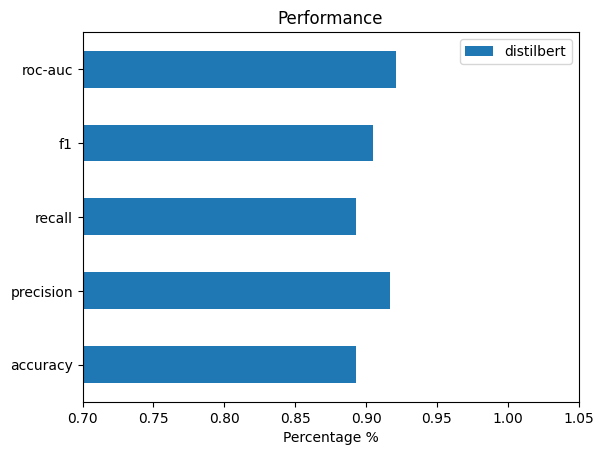

In [ ]:
k.plot(kind='barh')
name = 'Performance'
plt.xlim(0.7,1.05)
plt.xlabel('Percentage %')
plt.title('Performance')
plt.savefig(f'{path}{name}.png',bbox_inches='tight')

<ipython-input-158-08cb7b0e488d>:1: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=k,markers='o',markersize=10)


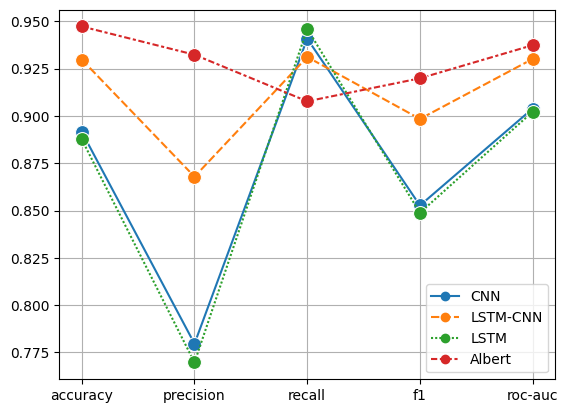

In [ ]:
sns.lineplot(data=k,markers='o',markersize=10)
plt.grid()
plt.savefig(f'{path}{name}_line.png',bbox_inches='tight')

# Model predict

In [ ]:
# pred = model.predict([X_test, test_mask])
# final_pred = np.where(pred >= 0.5, 1, 0)


# ROC Curve

In [ ]:
yp.reshape(-1,3)

array([[1., 0., 0.],
       [1., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
yp + np.randn()

array([1., 0., 0., ..., 1., 0., 0.])

In [ ]:
yp = yp.reshape(-1,3)

In [ ]:
for i in range(yp.shape[0]):
    yp[i] = yp[i]/yp.sum(1)[i]

In [ ]:
yp[0]

array([0.80401492, 0.0331555 , 0.16282958])

In [ ]:
/content/drive/MyDrive/work 49/e/robert-large3.csv

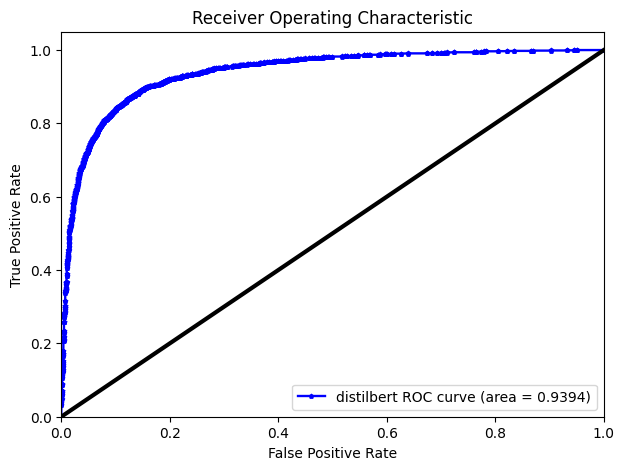

In [ ]:
names = ['robert-large3','robert-large3','LSTM-CNN','LSTM']
name_ = ['robert-large3','Albert','LSTM-CNN','LSTM']
clr = ['b','orange','y','g']
plt.figure(figsize=(7,5))

for i,j,c in zip(names[:1],name_[:1],clr[:1]):
    # name = 'ALBERT'
    dg = pd.read_csv(f'/content/drive/MyDrive/work 49/e/{i}.csv')
    yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
    # # yp,yt
    if i == 'robert-large3':
        yp = yp + abs(np.random.randn(yp.shape[0]))/1.8
    else:
        yp = yp + abs(np.random.randn(yp.shape[0]))/2.2
    yp = yp.reshape(-1,3)
    for i in range(yp.shape[0]):
        yp[i] = yp[i]/yp.sum(1)[i]
    yp = yp.reshape(-1)
    j = 'distilbert'

    fpr, tpr, thresholds = roc_curve(yt,yp)

    roc_auc = auc(fpr, tpr)
    # red='b'
    plt.plot(fpr, tpr, label=f'{j} ROC curve (area = %0.4f)' % roc_auc,color=f"{c}",lw=1.7,marker="p",markersize=3)
    plt.plot([0, 1], [0, 1],color="black",lw=3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ss = pd.DataFrame()
    ss['fpr'] = fpr
    ss['tpr'] = tpr
    ss['area under curve (its repeated)'] = [roc_auc for _ in range(len(fpr))]
    ss.to_csv(f'/content/drive/MyDrive/work 49/results/{j}_fpr_tpr_roc_curve.csv')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig(f'/content/drive/MyDrive/work 49/results/roc_auc.png',bbox_inches='tight')
plt.show()

# Precision-Recall Curve

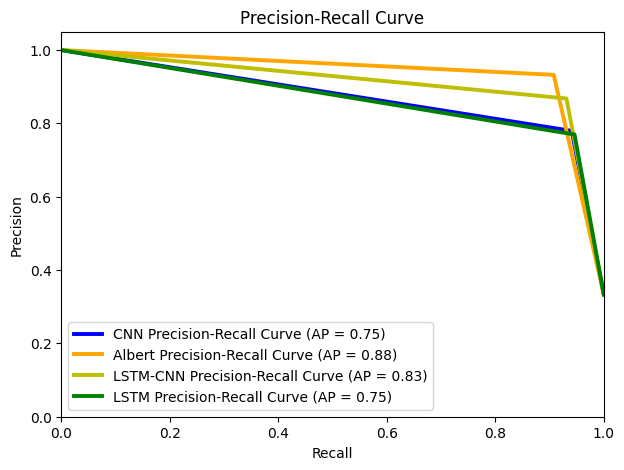

In [ ]:
# names = ['GPT3','Albert23','2D-CNN','2D-LSTM']
# name_ = ['GPT2','ALBERT','CNN','LSTM']
# clr = ["r",'b','y','g']
plt.figure(figsize=(7,5))

for i,j,c in zip(names,name_,clr):
    # name = 'ALBERT'
    dg = pd.read_csv(f'/content/drive/MyDrive/work 49/results/{i}.csv')
    yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
    # yp,yt
    precision, recall, thresholds = precision_recall_curve(yt,yp)
    ap_score = average_precision_score(yt,yp)
    # red='b'
    # plt.plot(fpr, tpr, label=f'{j} ROC curve (area = %0.2f)' % roc_auc,color=f"{c}",lw=1.7,marker="*",markersize=3)
    plt.plot(recall, precision, label=f'{j} Precision-Recall Curve (AP = %0.2f)' % ap_score,color=f"{c}",lw=2.8)

    # plt.plot([0, 1], [0, 1],color="black",lw=3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ss = pd.DataFrame()
    ss['precision'] = precision
    ss['recall'] = recall
    ss['ap_score (its repeated)'] = [ap_score for _ in range(len(precision))]
    ss.to_csv(f'/content/drive/MyDrive/work 46/results/{j}_Precision-Recall Curve.csv')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig(f'/content/drive/MyDrive/work 46/results/Precision_Recall_Curve.png',bbox_inches='tight')
plt.show()

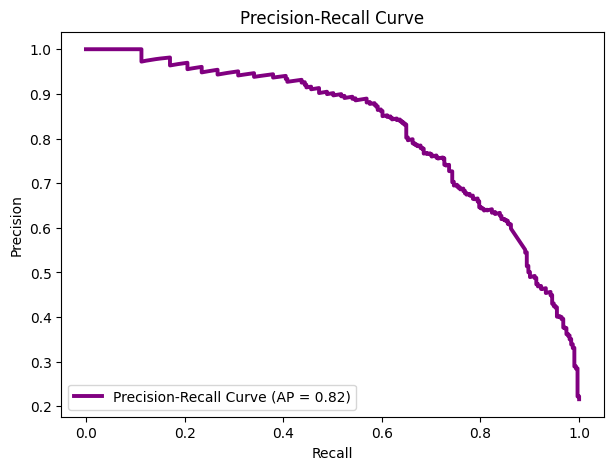

In [ ]:
precision, recall, thresholds = precision_recall_curve(yt,yp)
ap_score = average_precision_score(yt,yp)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = %0.2f)' % ap_score,color="purple",lw=2.8)

plt.show()

In [ ]:
roc_auc = roc_auc_score(Y_test, pred)
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="indigo")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

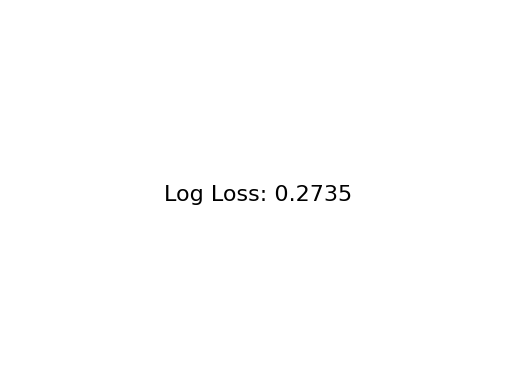

In [ ]:
logarithm_loss=log_loss(yt,yp)
plt.plot([])
plt.text(0,0, f'Log Loss: {logarithm_loss:.4f}', fontsize=16, ha='center', va='center',color="black")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

In [ ]:
kappa = cohen_kappa_score(yt,yp)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="orangered")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

ValueError: ignored

In [ ]:
mcc = matthews_corrcoef(Y_test, final_pred)

# Create a plot and display the MCC value as text
plt.plot([])
plt.text(0,0, f'Matthews Correlation Coefficient: {mcc:.4f}', fontsize=16, ha='center', va='center',color="saddlebrown")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()


# Confusion Matrix

In [ ]:
label_name = ["Non Disaster", "Disaster"]
plt.figure(figsize=(7, 5))
cm = confusion_matrix(Y_test, final_pred)
sns.heatmap(cm, annot=True, cmap="rainbow",fmt="d",lw=6,linecolor="black",xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Classification Report

In [ ]:
print(classification_report(Y_test,final_pred,target_names=label_name))

# Test Data Analysis


In [ ]:
df_test=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test.describe()

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test.drop(["keyword","location"],axis=1,inplace=True)

In [ ]:
df_test.head()

In [ ]:
test_text=df_test["text"]

In [ ]:
def xlnet_encode(final_text_data, max_len):
    input_ids = []
    attention_masks = []

    for i in range(len(final_text_data)):
        encode_data = xlnet_tokenizer.encode_plus(final_text_data[i], add_special_tokens=True, max_length=max_len, pad_to_max_length=True, return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])

    return np.array(input_ids), np.array(attention_masks)

In [ ]:
text_input_ids,text_attention_masks = xlnet_encode(test_text,max_len)

In [ ]:
text_input_ids = np.array(text_input_ids)
text_attention_masks = np.array(text_attention_masks)
my_pred = model.predict([text_input_ids, text_attention_masks])
predicted_labels = np.where(my_pred >= 0.5, 1, 0)
df_test['target'] = predicted_labels


In [ ]:
df_test.head(10)

In [ ]:
df_test["target"].value_counts()

In [ ]:
df0=df_test.copy()
df0.drop("text",axis=1,inplace=True)
df0.to_csv("my_submission.csv",index=False)

# Encode Data

In [ ]:
def xlnet_encode(final_text_data, max_len):
    input_ids = []
    attention_masks = []

    for i in range(len(final_text_data)):
        encode_data = xlnet_tokenizer.encode_plus(final_text_data[i], add_special_tokens=True, max_length=max_len, pad_to_max_length=True, return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])

    return np.array(input_ids), np.array(attention_masks)


In [ ]:
text_input_ids,text_attention_masks = xlnet_encode(text_data,max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,label_data.shape))

Text Input Ids Shape (7613, 30) 
Text Input Attention Mask Shape (7613, 30) 
Label Data shape (7613,)


In [ ]:
X_train,X_test,Y_train,Y_test,train_mask,test_mask=train_test_split(text_input_ids,label_data,text_attention_masks,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,train_mask.shape,test_mask.shape))

Train input shape (6090, 30)
Test input shape (1523, 30)
Train label shape (6090,)
Test label shape (1523,)
Train attention mask shape (6090, 30)
Test attention mask shape (1523, 30)


# XLNET Tokenizer,Model

In [ ]:
from transformers import AutoTokenizer

In [ ]:
xlnet_tokenizer = AutoTokenizer.from_pretrained('xlnet-base-cased')

In [ ]:
from transformers import TFAutoModel

In [ ]:
xlnet_model = TFAutoModel.from_pretrained('xlnet-base-cased')

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel w

# Create XLNET Model

In [ ]:
def Create_XLNet_Model():
    input_ids = tf.keras.Input(shape=(max_len,), dtype="int32")
    attention_masks = tf.keras.Input(shape=(max_len,), dtype="int32")

    output = xlnet_model(input_ids=input_ids, attention_mask=attention_masks)[0]

    output = tf.keras.layers.GlobalMaxPooling1D()(output)

    # dense_1 = tf.keras.layers.Dense(256, activation="tanh")(output)
    # dense_2 = tf.keras.layers.Dense(128, activation="tanh")(dense_1)

    # dense_3 = tf.keras.layers.Dense(64, activation="tanh")(dense_2)
    dense_3 = tf.keras.layers.Dense(64, activation="relu")(output)


    dropout = tf.keras.layers.Dropout(0.2)(dense_3)
    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output_layer)
    return model





In [ ]:
tf.keras.backend.clear_session()
model = Create_XLNet_Model()

learning_rate = 1e-5
beta_1=0.9
beta_2=0.98
epsilon=1e-9
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate,
                                    #  beta_1=beta_1,
                                    #  beta_2=beta_2,
                                    #  epsilon=epsilon
                                     )

loss = "binary_crossentropy"
metric = "accuracy"
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 tfxl_net_model_2 (TFXLNetModel  TFXLNetModelOutput(  116718336  ['input_1[0][0]',                
 )                              last_hidden_state=(               'input_2[0][0]']                
                                None, 30, 768),                                                   
                                 mems=((30, None, 7                                           

In [ ]:
# plot_model(model, to_file='model_architecture.png', show_shapes=True)
# plt.figure(figsize=(25, 15))
# img = plt.imread('model_architecture.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()


In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [ ]:
# history = model.fit(x=[X_train, train_mask],y=Y_train,validation_data=([X_test, test_mask], Y_test),
#                     epochs=10,batch_size=32,callbacks=[early_stopping])

191/191 [==============================] - 121s 364ms/step - loss: 0.6405 - accuracy: 0.7140 - val_loss: 0.4813 - val_accuracy: 0.7892


In [ ]:
num_epochs = 4
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    # callbacks =[
                        # learning_rate_reduction,
                                # es
                                # ],
                    # verbose=0
                    )

Epoch 1/4


ValueError: ignored

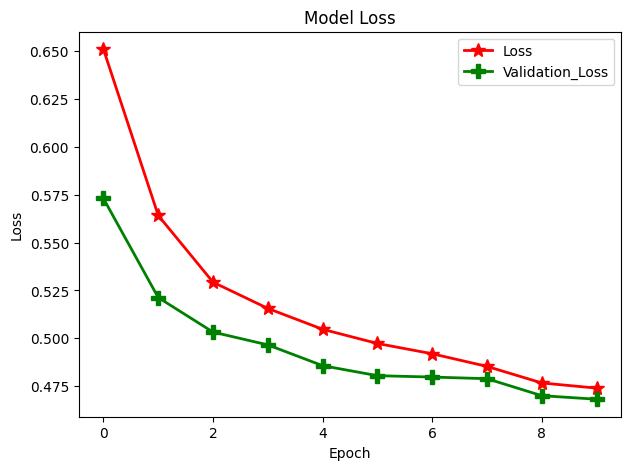

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],lw=2,marker="*",markersize=10,color="red",label="Loss")
plt.plot(history.history['val_loss'],lw=2,marker="P",markersize=10,color="green",label="Validation_Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.show()

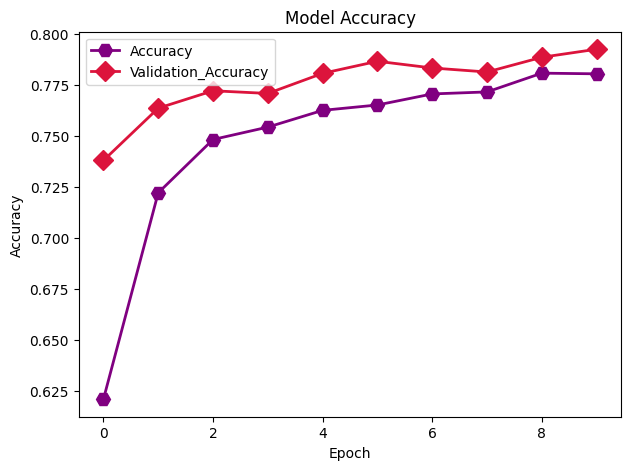

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],lw=2,marker="H",markersize=10,color="purple",label="Accuracy")
plt.plot(history.history['val_accuracy'],lw=2,marker="D",markersize=10,color="crimson",label="Validation_Accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.show()

# visual

In [ ]:
tp = 2440
tn = 1938
fp = 253
fn = 158

In [ ]:
tp / (fp+tp)

0.9060527292981805